<a href="https://colab.research.google.com/github/junil2/string/blob/main/deep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
class FeedforwardNeuralNetModel(nn.Module):
  def __init__(self,input_dim,hidden_dim,output_dim):
    super(FeedforwardNeuralNetModel,self).__init__()
    # 선형기능
    self.fc1=nn.Linear(input_dim,hidden_dim)
    # 비선형
    self.sigmoid=nn.Sigmoid()
    # 출력 선형 기능
    self.fc2=nn.Linear(hidden_dim,output_dim)
  def forward(self,x):
    # 선형기능
    out=self.fc1(x)
    # 비선형
    out=self.sigmoid(out)
    #선형기능
    out=self.fc2(out)
    return out


In [ ]:
# input data 생성
x_vals=np.random.rand(500)
x_train=np.asarray(x_vals,dtype=np.float32).reshape(-1,1)
y_correct=np.asarray([i**2 for i in x_vals],dtype=np.float32).reshape(-1,1)
# 네트워크 인스턴트화
input_dim=1
output_dim=1
hidden_dim=20
modelFF=FeedforwardNeuralNetModel(input_dim,hidden_dim,output_dim)
criterionFF=nn.MSELoss()
l_rate=0.01
optimiser=torch.optim.Adam(modelFF.parameters(),lr=l_rate)
epochs=5000

Traning

In [ ]:
for epoch in range(epochs):
  epoch +=1
  inputs=Variable(torch.from_numpy(x_train))
  labels=Variable(torch.from_numpy(y_correct))
  #grads 초기화
  optimiser.zero_grad()
  # 값 예측
  outputs=modelFF.forward(inputs)
  loss=criterionFF(outputs,labels)
  loss.backward()
  optimiser.step()
  if (epoch+1)%500==0:
    print('Epoch [%d/%d],Loss:%.4f' %(epoch+1,epochs,loss.item()))
    print('Final -epoch{}, loss{}'.format(epoch,loss.item()))

Epoch [500/5000],Loss:0.0001
Final -epoch499, loss0.00010485721577424556
Epoch [1000/5000],Loss:0.0001
Final -epoch999, loss6.0691840189974755e-05
Epoch [1500/5000],Loss:0.0000
Final -epoch1499, loss4.909393101115711e-05
Epoch [2000/5000],Loss:0.0000
Final -epoch1999, loss3.3786600397434086e-05
Epoch [2500/5000],Loss:0.0000
Final -epoch2499, loss2.0398880224092864e-05
Epoch [3000/5000],Loss:0.0000
Final -epoch2999, loss9.943396435119212e-06
Epoch [3500/5000],Loss:0.0000
Final -epoch3499, loss3.967364136769902e-06
Epoch [4000/5000],Loss:0.0000
Final -epoch3999, loss1.977534338948317e-06
Epoch [4500/5000],Loss:0.0000
Final -epoch4499, loss1.2770321973221144e-06
Epoch [5000/5000],Loss:0.0000
Final -epoch4999, loss3.2312070743500954e-06


Test Training

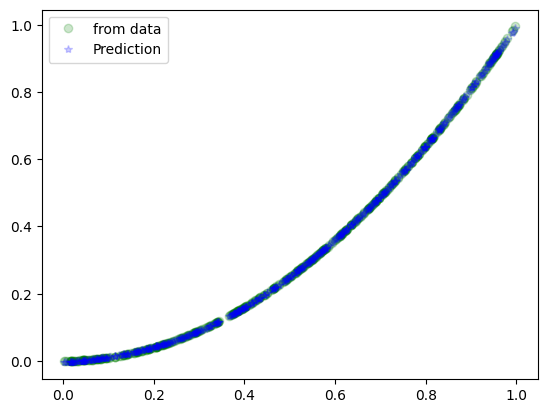

In [ ]:
predicted=modelFF.forward(Variable(torch.from_numpy(x_train))).data.numpy()
plt.plot(x_train,y_correct,'go',label='from data',alpha=0.2)
plt.plot(x_train,predicted,'b*',label='Prediction',alpha=0.2)
plt.legend()
plt.show()